In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader


In [62]:

print(torch.cuda.is_available())  # Esto debe devolver True si hay una GPU disponible
print(torch.cuda.device_count())  # Muestra cuántas GPUs están disponibles
print(torch.cuda.current_device())  # Muestra el índice de la GPU que se está usando actualmente
print(torch.cuda.get_device_name(0))  # Muestra el nombre de la GPU


True
1
0
NVIDIA GeForce RTX 4050 Laptop GPU


In [63]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [122]:
train_dir = r'C:\Users\cabal\Desktop\Hacks\AgrIA\Data\Training'
train_dir.replace("\\","/")

# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Cambia el tamaño de las imágenes
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar entre [-1, 1]
])


In [125]:
trainset = datasets.ImageFolder(root=train_dir, transform=transform)

# Crear el DataLoader
trainloader = DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)

# Obtener las clases desde el dataset
class_names = trainset.classes  # Esto debe contener las clases en el orden en que el modelo fue entrenado

print(class_names)

['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']


In [126]:
# Verificar un lote de entrenamiento
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar tamaño de los tensores
print(images.shape) 
print(labels.shape)  

torch.Size([1, 3, 150, 150])
torch.Size([1])


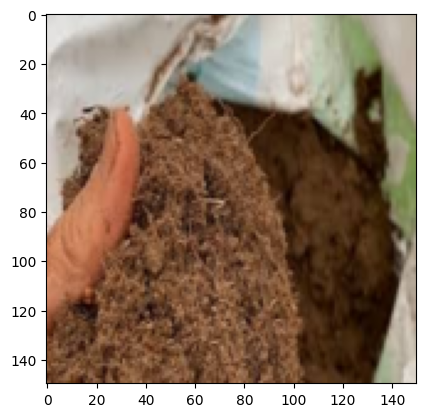

In [67]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# show images
imshow(torchvision.utils.make_grid(images))

In [104]:
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# net = Net()

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir una red simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(trainset.classes))  # Número de clases en la última capa

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Crear el modelo, criterio y optimizador
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Entrenar el modelo
for epoch in range(20):  # Entrenar por 10 épocas
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:    # Imprimir cada 100 minibatches
            print(f'[Epoch {epoch + 1}, Minibatch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Minibatch 10] loss: 0.162
[Epoch 1, Minibatch 20] loss: 0.159
[Epoch 1, Minibatch 30] loss: 0.160
[Epoch 1, Minibatch 40] loss: 0.155
[Epoch 1, Minibatch 50] loss: 0.164
[Epoch 1, Minibatch 60] loss: 0.155
[Epoch 1, Minibatch 70] loss: 0.151
[Epoch 1, Minibatch 80] loss: 0.156
[Epoch 1, Minibatch 90] loss: 0.131
[Epoch 1, Minibatch 100] loss: 0.112
[Epoch 1, Minibatch 110] loss: 0.125
[Epoch 1, Minibatch 120] loss: 0.111
[Epoch 1, Minibatch 130] loss: 0.102
[Epoch 2, Minibatch 10] loss: 0.129
[Epoch 2, Minibatch 20] loss: 0.080
[Epoch 2, Minibatch 30] loss: 0.130
[Epoch 2, Minibatch 40] loss: 0.094
[Epoch 2, Minibatch 50] loss: 0.070
[Epoch 2, Minibatch 60] loss: 0.138
[Epoch 2, Minibatch 70] loss: 0.090
[Epoch 2, Minibatch 80] loss: 0.105
[Epoch 2, Minibatch 90] loss: 0.109
[Epoch 2, Minibatch 100] loss: 0.232
[Epoch 2, Minibatch 110] loss: 0.114
[Epoch 2, Minibatch 120] loss: 0.134
[Epoch 2, Minibatch 130] loss: 0.147
[Epoch 3, Minibatch 10] loss: 0.089
[Epoch 3, Minibatch 

Clase predicha: Yellow Soil


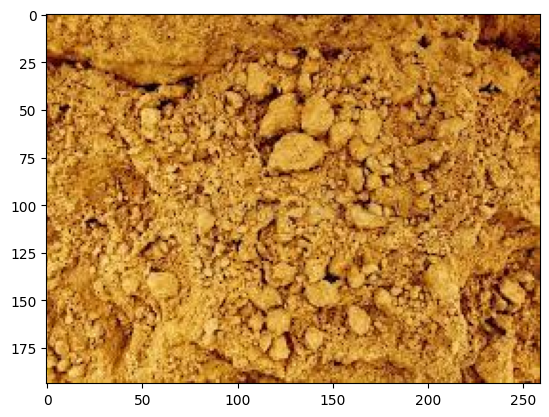

In [98]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar una imagen desde la ruta
image_path = r'C:\Users\cabal\Desktop\Hacks\AgrIA\Data\Test\Yellow Soil\4.jpg'  # Cambia por la ruta a tu imagen
image_path.replace("\\","/")
# Transformar la imagen (aplicar los mismos transform usados en el entrenamiento)
image = Image.open(image_path)
image = transform(image).unsqueeze(0)  # Añadir una dimensión extra para el batch

# Colocar el modelo en modo de evaluación
model.eval()

# Desactivar autograd para hacer la predicción
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# Mostrar el resultado
print(f'Clase predicha: {trainset.classes[predicted.item()]}')

# Mostrar la imagen
plt.imshow(Image.open(image_path))
plt.show()


In [110]:
dummy_input = torch.randn(1, 3, 150, 150)  # Dimensiones: batch_size, canales, altura, anchura
import torch.onnx

# Exportar el modelo a ONNX
torch.onnx.export(model,                # El modelo PyTorch
                  dummy_input,          # Una entrada de ejemplo para el modelo
                  "simple_cnn.onnx",    # El archivo donde se guardará el modelo
                  export_params=True,   # Exportar los parámetros entrenados
                  opset_version=11,     # Asegura la compatibilidad con ONNX
                  do_constant_folding=True,  # Aplicar optimizaciones
                  input_names=['input'],     # Nombres de las entradas
                  output_names=['output'],   # Nombres de las salidas
                  dynamic_axes={'input': {0: 'batch_size'},  # Permitir tamaño variable en el batch
                                'output': {0: 'batch_size'}})


In [111]:
import onnx

# Cargar el modelo ONNX
onnx_model = onnx.load("simple_cnn.onnx")

# Verificar el modelo
onnx.checker.check_model(onnx_model)
print('El modelo ONNX es válido.')


El modelo ONNX es válido.


## Correr aquí

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [1]:

# Convertir el modelo ONNX a formato OpenVINO IR
ov_model = ov.convert_model('simple_cnn.onnx')

# Guardar el modelo usando un método actualizado si existe (OpenVINO debería tenerlo disponible)
from openvino.runtime import serialize

serialize(ov_model, "simple_cnn.xml", "simple_cnn.bin")


In [2]:
import openvino.runtime as ov

# Cargar el modelo IR
core = ov.Core()
ov_model = core.read_model("simple_cnn.xml")

# Compilar el modelo para el dispositivo deseado (por ejemplo, CPU)
compiled_model = core.compile_model(ov_model, 'CPU')

# Ahora ya puedes hacer inferencias


In [15]:
from PIL import Image

# Ruta de la imagen de prueba
image_path = r'/workspaces/AgrIA/Data/Test/Yellow Soil/2.jpg'
#image_path.replace("\\","/") # Para reemplazo de barras por entorno

# Cargar la imagen
image = Image.open(image_path)
# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Cambia el tamaño de las imágenes
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar entre [-1, 1]
])


# Aplicar la transformación a la imagen
input_image = transform(image).unsqueeze(0).numpy()  # Agregar la dimensión del batch

In [16]:
import openvino.runtime as ov

# Asumiendo que ya tienes el modelo cargado y compilado
core = ov.Core()
compiled_model = core.compile_model("simple_cnn.xml", "CPU")  # Compila el modelo si no lo has hecho

# Crear una solicitud de inferencia
infer_request = compiled_model.create_infer_request()

# Realizar la inferencia
output = infer_request.infer({0: input_image})

# Procesar la salida
output_data = output[compiled_model.output(0)]

# Asumiendo que 'predicted_class' es el índice de la clase predicha
predicted_class = np.argmax(output_data)  # Este es el índice que predice el modelo
class_names=['Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Yellow Soil']
# Mapear el índice de predicción al nombre de la clase
predicted_label = class_names[predicted_class]

# Mostrar el resultado
print(f'Clase predicha: {predicted_label}')



Clase predicha: Yellow Soil
